In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import eager_gradcam

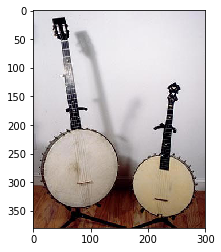

In [2]:
im = Image.open('images/banjo.jpg')
plt.imshow(im)

In [3]:
model_with_top = tf.keras.applications.InceptionV3(include_top=True)

In [4]:
im_tf = np.expand_dims((np.array(im.resize((299,299)))/255).astype(np.float32), axis=0)  # preprocess the input image


In [5]:
pred = model_with_top.predict(im_tf)
print(np.argmax(pred))
print(np.max(pred))

420
0.9999063


It's best to use last layer which is devoid of activation function, thus we load InceptionV3 without including top layers and we add GAP and one Dense layer of the same dimensionality as the original but with no activation. 

Obviusly taking predictions from such model makes no sense, as there is no trained final layer in such case. But insofar as we care about outputs of convolutional layers and what features they 'see', this is perfectly ok.

In [24]:
model_init = tf.keras.applications.InceptionV3(include_top=False)  # loading base model without last layers

In [25]:

y = model_init.output
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(1000, activation='softmax', name='output_dense')(y) # activation none for Grad-CAM
model = tf.keras.models.Model(inputs=model_init.input, outputs=y)


### It's that easy:

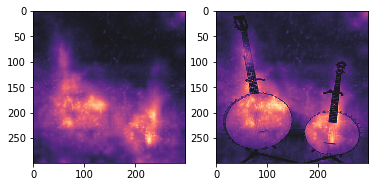

In [27]:
eager_gradcam.grad_cam('images/banjo.jpg', model, (299,299))

On the left you see the gradient heatmap.

On the right you see gradient heatmap element-wise multiplied with the original resized image.

A comment on image size: it's strongly recommended to use image dimensions that are consistent with image dimensions used for training of the network. In case of InceptionV3 these are 299 x 299 pixels.

A comment on performance: there might be glitches and it seems for now that in many cases when you load the model and get an error saying that there is no layer of a given name, it seems like TensorFlow's eager mode is bugging up. To fix this simply redeclare your model.